In [ ]:
## Notebook env: mirtud_env (R kernel)

In [1]:
library(Seurat)
library(tidyr)
library(dplyr)
library(ggplot2)
library(ggrepel)
library(ggpubr)

The legacy packages maptools, rgdal, and rgeos, underpinning this package
will retire shortly. Please refer to R-spatial evolution reports on
https://r-spatial.org/r/2023/05/15/evolution4.html for details.
This package is now running under evolution status 0 

Attaching SeuratObject


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [2]:
adata.R = readRDS('/home/ssobti/projects/mir_tud/101423_filtered_data/tRF_normalized_integrated_seurat.rds')

In [3]:
adata.R <- CellCycleScoring(object = adata.R, g2m.features = cc.genes$g2m.genes, s.features = cc.genes$s.genes)

Warning message:
“The following features are not present in the object: MCM5, PCNA, TYMS, MCM2, MCM4, RRM1, UNG, GINS2, MCM6, CDCA7, PRIM1, UHRF1, MLF1IP, HELLS, RFC2, RPA2, NASP, GMNN, WDR76, SLBP, UBR7, POLD3, MSH2, RAD51, CDC45, TIPIN, DSCC1, BLM, CASP8AP2, USP1, CHAF1B, not searching for symbol synonyms”
Warning message:
“The following features are not present in the object: CKS1B, TMPO, FAM64A, ANP32E, HN1, RANGAP1, ECT2, LBR, CTCF, CBX5, not searching for symbol synonyms”


In [4]:
adata.R@meta.data -> meta
s_scores_df = data.frame(score = meta$S.Score, guide = meta$guide, type = ifelse(startsWith(meta$guide, 'TuD_NC'), 'control', 'guide'))
s_scores_df %>% group_by(guide) %>% summarise(score = median(score), type = unique(type)) -> s_scores_df
g2m_scores_df = data.frame(score = meta$G2M.Score, guide = meta$guide, type = ifelse(startsWith(meta$guide, 'TuD_NC'), 'control', 'guide'))
g2m_scores_df %>% group_by(guide) %>% summarise(score = median(score), type = unique(type)) -> g2m_scores_df

Warning message:
“ggrepel: 195 unlabeled data points (too many overlaps). Consider increasing max.overlaps”
Warning message:
“ggrepel: 205 unlabeled data points (too many overlaps). Consider increasing max.overlaps”


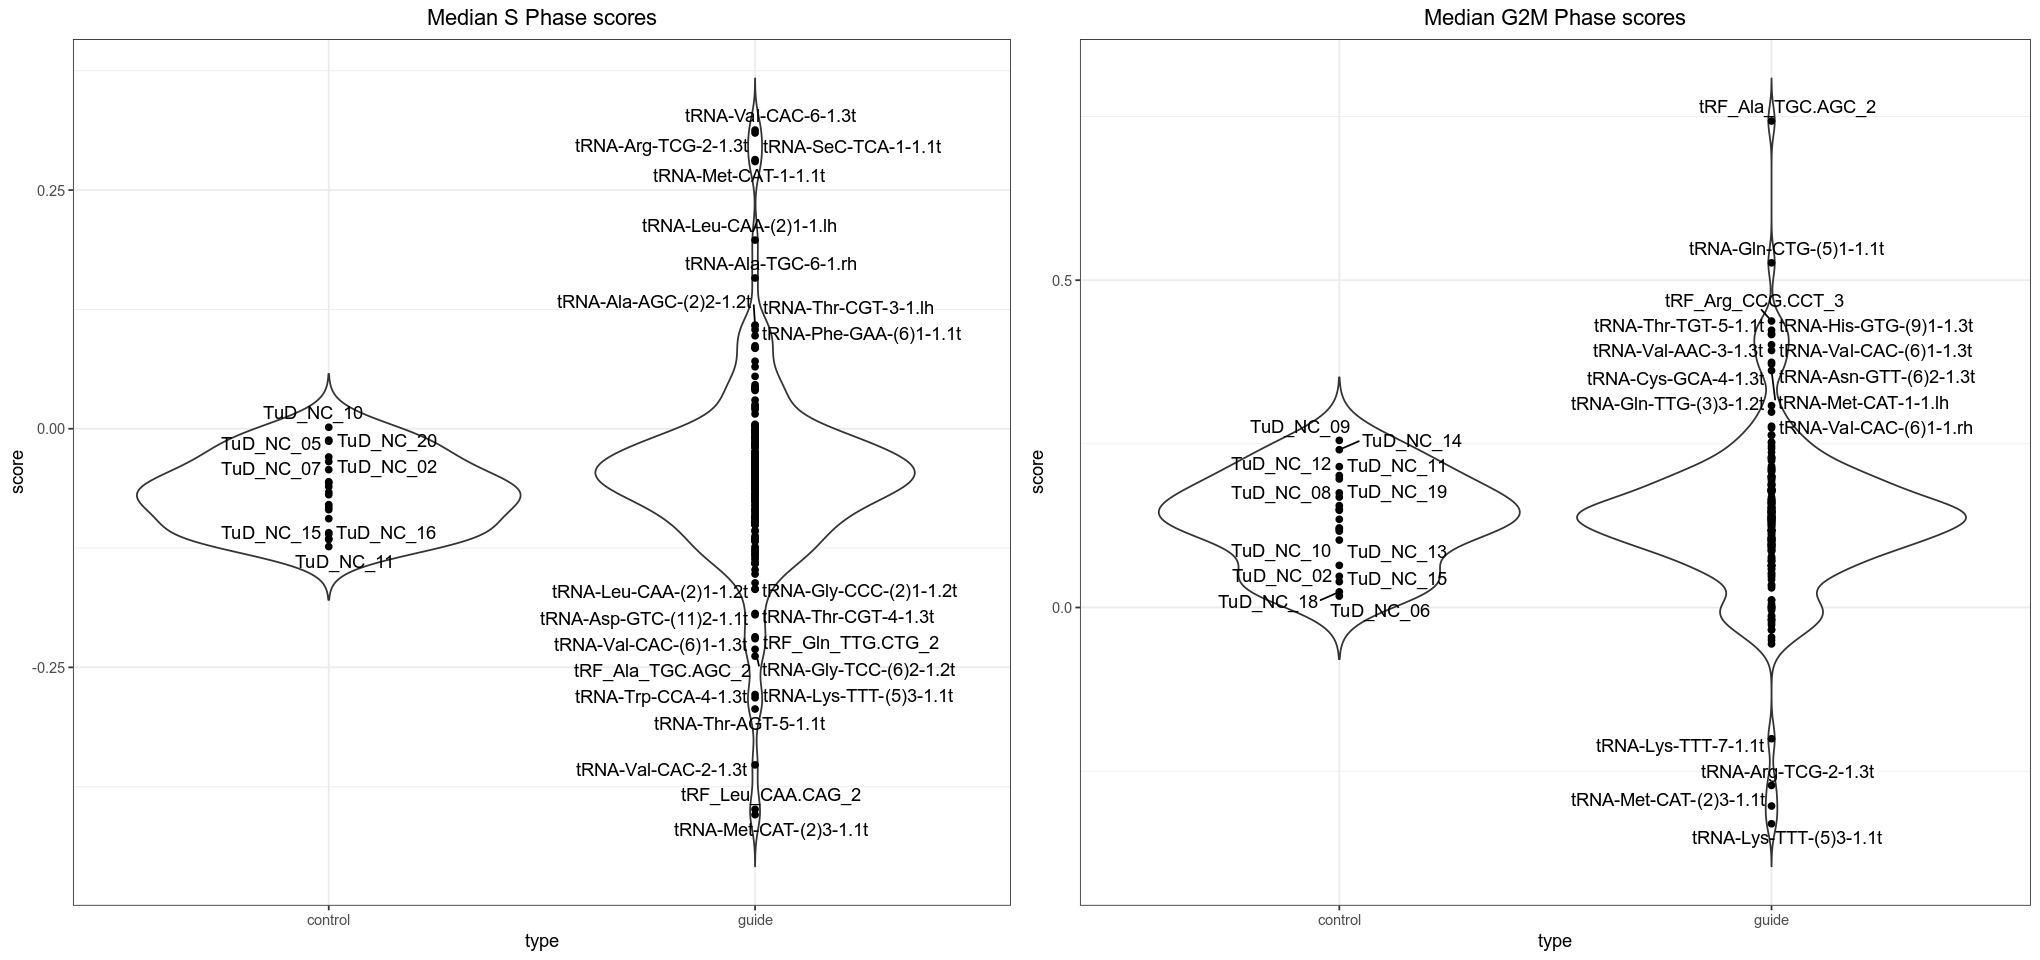

In [5]:
options(repr.plot.width = 17, repr.plot.height = 8)
s_phase = ggplot(s_scores_df, aes(x=type, y=score)) + 
    geom_violin(trim=FALSE) + geom_point() + geom_text_repel(aes(label=guide)) + ggtitle('Median S Phase scores') + theme_bw() + theme(plot.title = element_text(hjust = 0.5))


g2m_phase = ggplot(g2m_scores_df, aes(x=type, y=score)) + 
    geom_violin(trim=FALSE) + geom_point() + geom_text_repel(aes(label=guide)) + ggtitle('Median G2M Phase scores') + theme_bw() + theme(plot.title = element_text(hjust = 0.5))

ggarrange(s_phase, g2m_phase, ncol = 2)

ggsave('/home/ssobti/projects/mir_tud/output_data/cellcycle/tRF/tRF_cellcycle_scores_violin_all_perturbations_including_low_cell_counts.pdf', width = 17, height = 8)

In [6]:
## pick out genes with scores > 0.25 or < -0.25

## S phase
s_scores_df %>% filter(score > 0.25 | score < -0.25) %>% arrange(-score) %>% filter(!startsWith(guide, 'TuD')) %>% select(-type) -> s_scores_df_outliers

## G2M phase
g2m_scores_df %>% filter(score > 0.25 | score < -0.25) %>% arrange(-score) %>% filter(!startsWith(guide, 'TuD')) %>% select(-type) -> g2m_scores_df_outliers

In [7]:
s_scores_df_outliers

guide,score
<chr>,<dbl>
tRNA-Val-CAC-6-1.3t,0.3128437
tRNA-Arg-TCG-2-1.3t,0.3098000
tRNA-SeC-TCA-1-1.1t,0.2818730
tRNA-Met-CAT-1-1.1t,0.2798855
tRNA-Trp-CCA-4-1.3t,-0.2784219
tRNA-Lys-TTT-(5)3-1.1t,-0.2818530
tRNA-Thr-AGT-5-1.1t,-0.2935932
tRNA-Val-CAC-2-1.3t,-0.3521217
tRF_Leu_CAA.CAG_2,-0.3986486


In [8]:
g2m_scores_df_outliers

guide,score
<chr>,<dbl>
tRF_Ala_TGC.AGC_2,0.7431016
tRNA-Gln-CTG-(5)1-1.1t,0.5264946
tRF_Arg_CCG.CCT_3,0.4375377
tRNA-Thr-TGT-5-1.1t,0.4236018
tRNA-His-GTG-(9)1-1.3t,0.4181027
tRNA-Val-AAC-3-1.3t,0.4168977
tRNA-Val-CAC-(6)1-1.3t,0.4013481
tRF_Leu_CAA.CAG_2,0.3925956
tRNA-Cys-GCA-4-1.3t,0.3745213


In [9]:
write.csv(s_scores_df_outliers, '/home/ssobti/projects/mir_tud/output_data/cellcycle/tRF/s_phase_outliers.csv')
write.csv(g2m_scores_df_outliers, '/home/ssobti/projects/mir_tud/output_data/cellcycle/tRF/g2m_phase_outliers.csv')